<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/III.%20Matematica_Ciencia_Datos/7_Grafos_con_NetworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías


In [ ]:
import networkx as nx
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Creación de una instancia de tipo "Grafo"

Para crear un grafo en NetworkX, se debe crear un objeto de tipo "Grafo" utilizando la función nx.Graph(). Esta función crea un grafo vacío, sin nodos ni ejes, al que se pueden agregar elementos más adelante.



In [ ]:
G = nx.Graph()
print(G)

Graph with 0 nodes and 0 edges


Una vez que el objeto Grafo ha sido creado, se puede poblar con nodos y conexiones. Para ello se utilizan dos métodos:


*   add_nodes_from: añade multiples nodos al grafo.
*   add_edge: añade un eje entre los nodos u y v. Si los nodos no existen, se crean y añaden automáticamente al grafo.
*   add_edges_from: mismo comportamiento que add_edge pero utilizando una colección de ejes. Cada eje se define con una tupla (u, v).


El nombre de los nodos puede ser tanto de numérico como caracteres.

Graph with 1 nodes and 0 edges


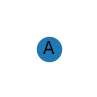

In [ ]:
# Añadir un único nodo
# ======================================================================================
fig, ax = plt.subplots(figsize=(1,1))
G.add_node("A")
nx.draw(G, with_labels=True, ax=ax)
print(G)

Graph with 3 nodes and 0 edges


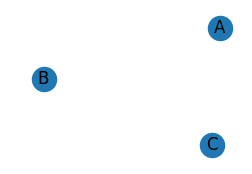

In [ ]:
# Añadir multiples nodos
# ======================================================================================
G.add_nodes_from(["B", "C"])

fig, ax = plt.subplots(figsize=(3, 2))
nx.draw(G, with_labels=True, ax=ax)
ax.set_xlim([1.2*x for x in ax.get_xlim()])
ax.set_ylim([1.2*y for y in ax.get_ylim()])
print(G)

Graph with 3 nodes and 1 edges


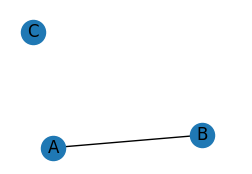

In [ ]:
# Añadir un único eje
# ======================================================================================
G.add_edge("A", "B")

fig, ax = plt.subplots(figsize=(3, 2))
nx.draw(G, with_labels=True, ax=ax)
ax.set_xlim([1.2*x for x in ax.get_xlim()])
ax.set_ylim([1.2*y for y in ax.get_ylim()])
print(G)

Graph with 3 nodes and 3 edges


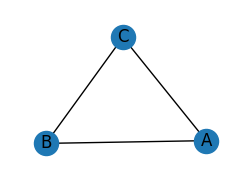

In [ ]:
# Añadir múltiples ejes
# ======================================================================================
G.add_edges_from([("A", "C"), ("B", "C")])

fig, ax = plt.subplots(figsize=(3, 2))
nx.draw(G, with_labels=True, ax=ax)
ax.set_xlim([1.2*x for x in ax.get_xlim()])
ax.set_ylim([1.2*y for y in ax.get_ylim()])
print(G)

Graph with 6 nodes and 5 edges


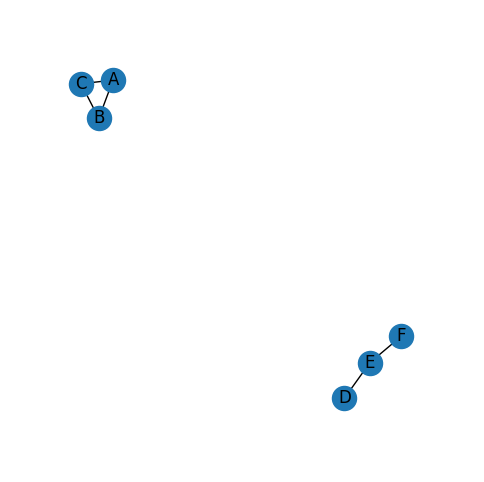

In [ ]:
G.add_edges_from([("D", "E"), ("E", "F")])

fig, ax = plt.subplots(figsize=(6, 6))
nx.draw(G, with_labels=True, ax=ax)
ax.set_xlim([1.2*x for x in ax.get_xlim()])
ax.set_ylim([1.2*y for y in ax.get_ylim()])
print(G)

# Matriz de Adyacencia

In [ ]:
adjM = nx.adjacency_matrix(G)

adjM = adjM.todense()
adjM

array([[0, 1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0]])

# Número de nodos y aristas

In [ ]:
print('La cantidad de nodos es', G.number_of_nodes())
print('La cantidad de aristas es', G.number_of_edges())


La cantidad de nodos es 6
La cantidad de aristas es 5


# Creación de un grafo desde un data frame

In [ ]:
# Dataframe con las conexiones del grafo
# ======================================================================================
conexiones = pd.DataFrame(
    {
        "inicio": ["A", "B", "C","D","D"],
        "fin": ["C", "C", "D","E","A"],
    }
)
conexiones

,inicio,fin
0,A,C
1,B,C
2,C,D
3,D,E
4,D,A


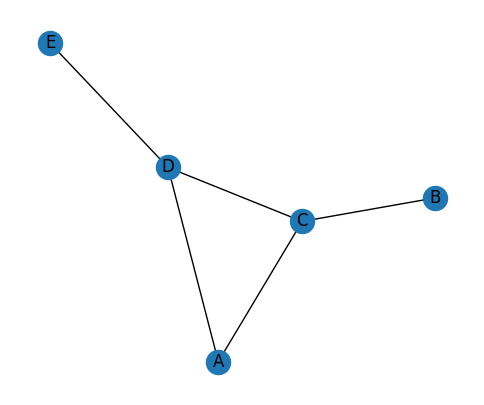

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))
G = nx.from_pandas_edgelist(conexiones, source="inicio", target="fin")
nx.draw(G, with_labels=True, ax=ax)

# Grafos dirigidos

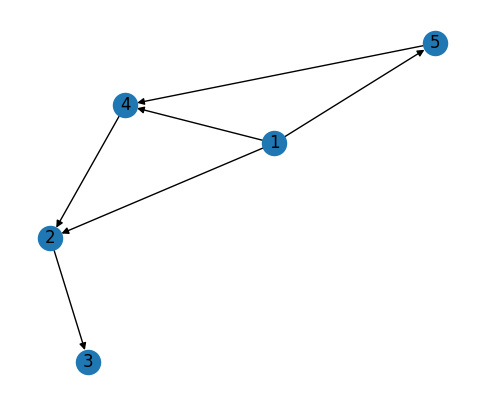

In [ ]:
# Creación de un grafo dirigido".
# ======================================================================================
G = nx.DiGraph()

# Conexiones
G.add_edges_from([(1, 2), (2, 3), (1, 4), (1, 5), (4, 2), (5, 4)])

# Representación gráfica
fig, ax = plt.subplots(figsize=(6,5))
nx.draw(G, with_labels=True, ax=ax)


In [ ]:
# Dataframe con las conexiones del grafo
# ======================================================================================
conexiones = pd.DataFrame(
    {
        "inicio": ["A", "B", "C","D","D","E"],
        "fin": ["C", "C", "D","E","A","D"],
    }
)
conexiones

,inicio,fin
0,A,C
1,B,C
2,C,D
3,D,E
4,D,A
5,E,D


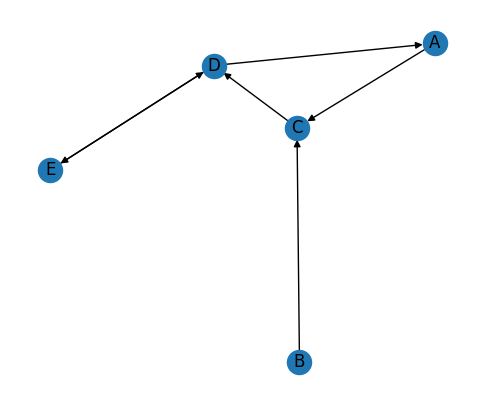

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))
G = nx.from_pandas_edgelist(conexiones, source="inicio", target="fin",create_using = nx.DiGraph)
nx.draw(G, with_labels=True, ax=ax)

In [ ]:
# Se verifica que sí es un grafo dirigido.

G.is_directed()


True

In [ ]:
# Matriz de Adyacencia
adjM = nx.adjacency_matrix(G)
adjM = adjM.todense()
adjM

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]])

# Grafo Ponderado

In [ ]:
# Creacion del grafo
G = nx.Graph()

# Nodos y vonexiones
G.add_weighted_edges_from(
    [(1, 2, 0.5),
    (2, 3, 0.9),
    (1, 4, 0.1),
    (1, 5, 0.75),
    (4, 2, 0.01),
    (5, 4, 0.3)]
)
G.edges(data=True)

EdgeDataView([(1, 2, {'weight': 0.5}), (1, 4, {'weight': 0.1}), (1, 5, {'weight': 0.75}), (2, 3, {'weight': 0.9}), (2, 4, {'weight': 0.01}), (4, 5, {'weight': 0.3})])

In [ ]:
G.is_directed()


False

In [ ]:
nx.is_weighted(G)

True

In [ ]:
# Se muestra el peso de cada eje, así como los nodos que conecta
[a for a in G.edges(data=True)]

[(1, 2, {'weight': 0.5}),
 (1, 4, {'weight': 0.1}),
 (1, 5, {'weight': 0.75}),
 (2, 3, {'weight': 0.9}),
 (2, 4, {'weight': 0.01}),
 (4, 5, {'weight': 0.3})]

In [ ]:
## Para extraer los pesos, se itera sobre cada eje y se accede al tercer elemento de la tupla.
weights = [a[2]["weight"] for a in G.edges(data=True)]
weights

[0.5, 0.1, 0.75, 0.9, 0.01, 0.3]

# Tipos de Layout

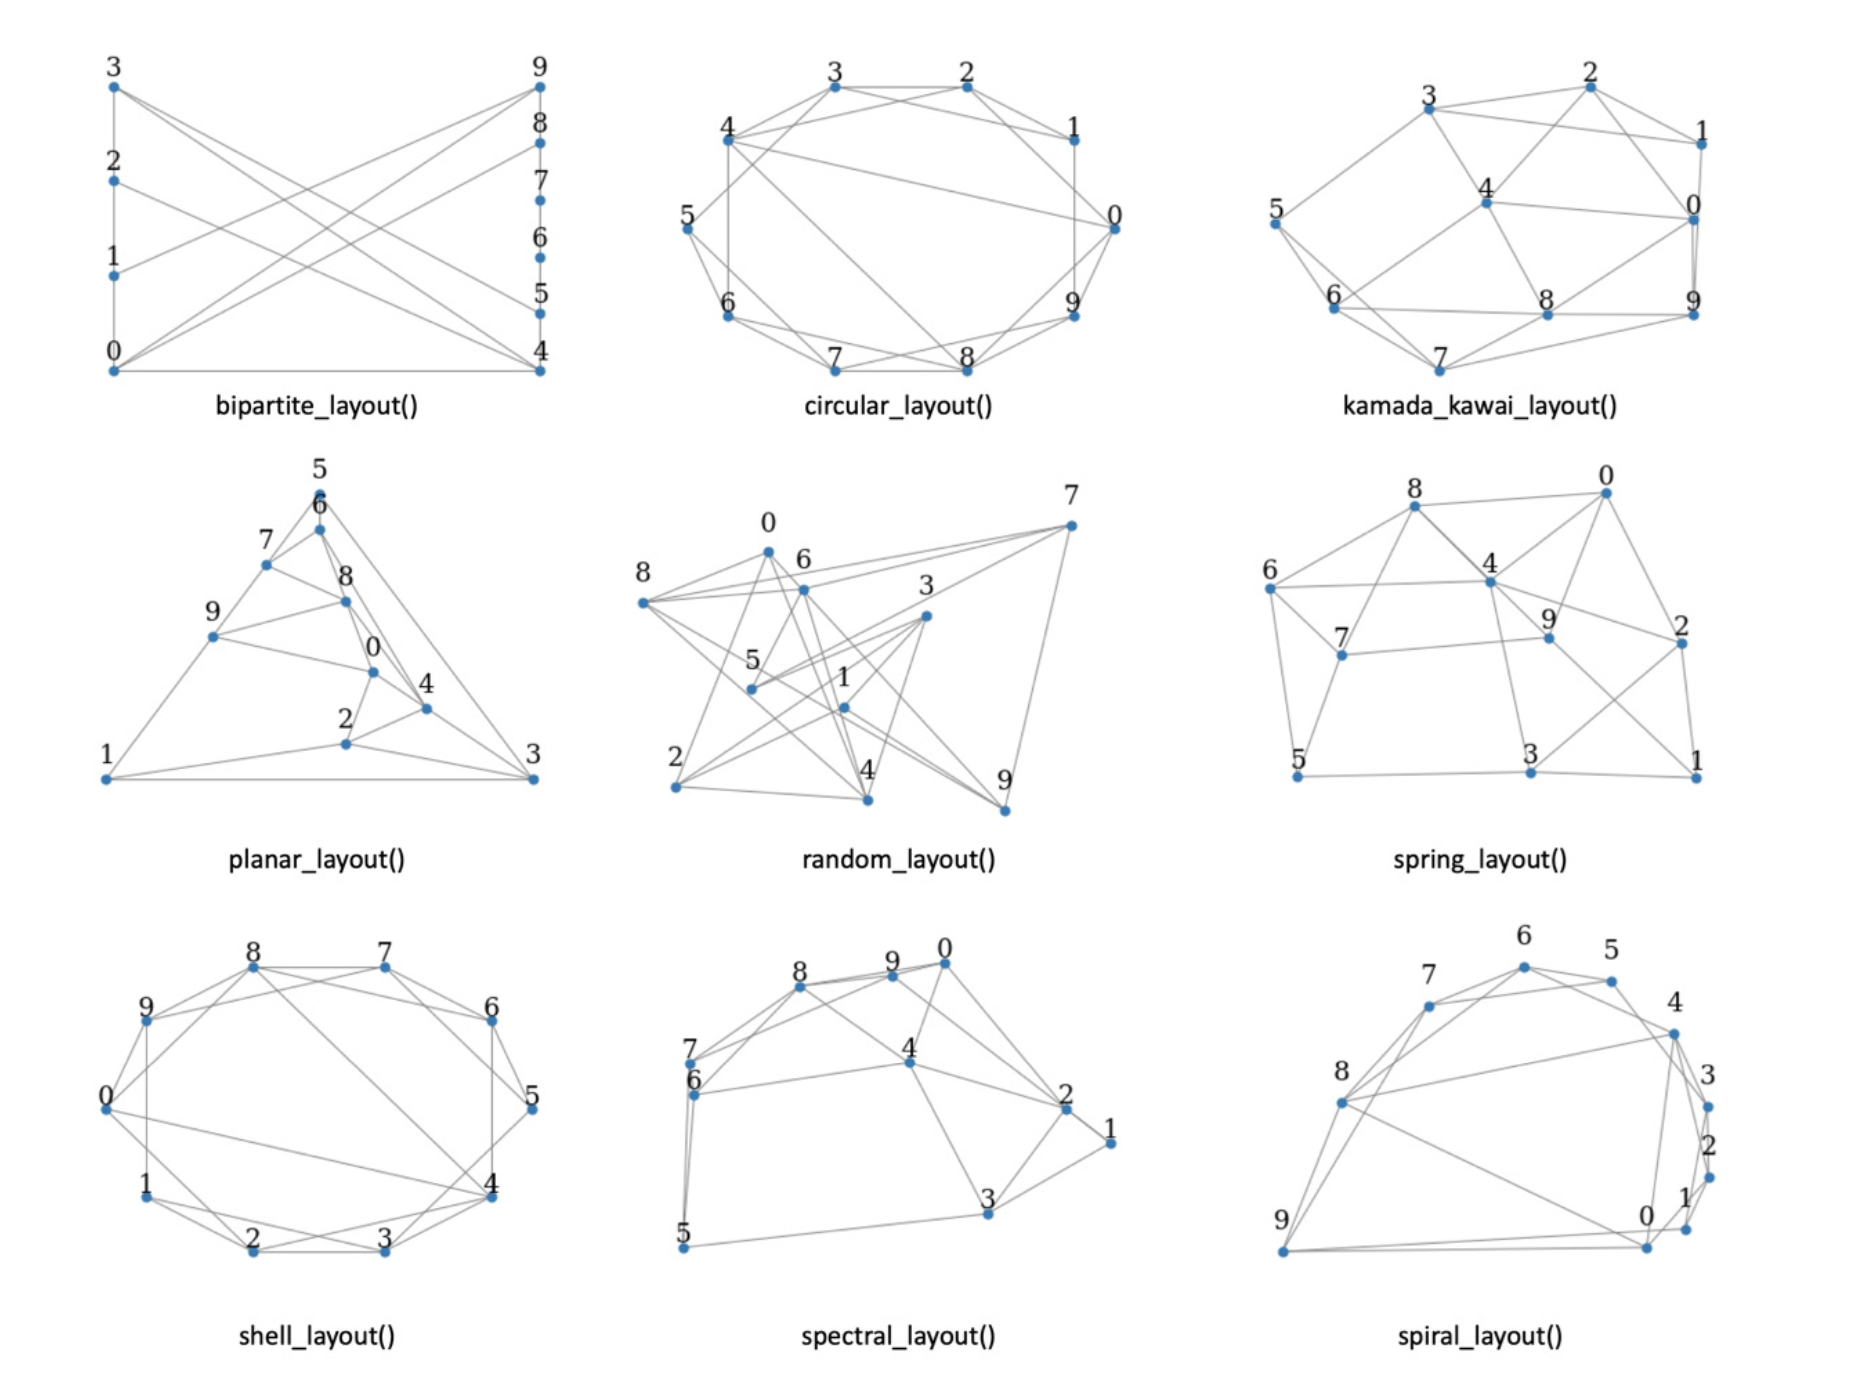

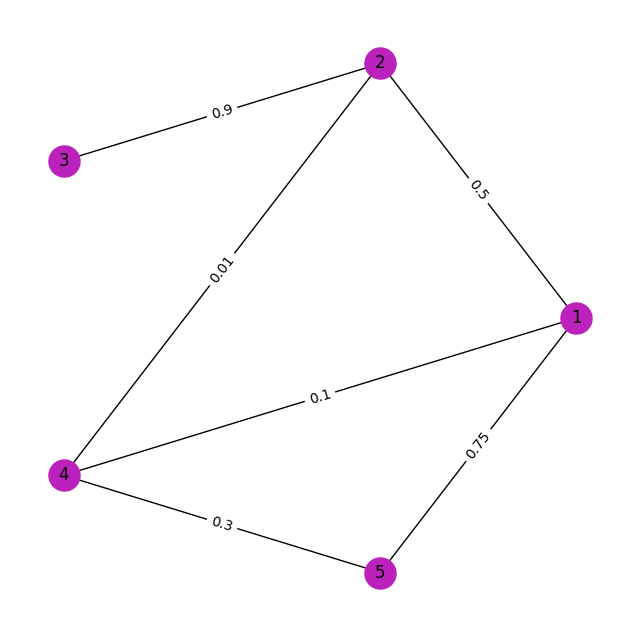

In [ ]:
layout=nx.circular_layout(G)
fig, ax = plt.subplots(figsize=(8,8))
pesos = nx.get_edge_attributes(G,'weight')
nx.draw(G,layout,with_labels=True, node_color='#bb22bb',node_size=500)
nx.draw_networkx_edge_labels(G,layout,edge_labels=pesos)
plt.show()

In [ ]:
pesos

{(1, 2): 0.5,
 (1, 4): 0.1,
 (1, 5): 0.75,
 (2, 3): 0.9,
 (2, 4): 0.01,
 (4, 5): 0.3}

In [ ]:
print("Los vértices de G son {}".format(list(G.nodes)))
print("Las aristas de G son {}".format(list(G.edges)))
print("El peso de la arista (4,3) es {}".format(G[4][1]['weight']))
print("Las aristas de G y sus pesos son {}".format(list(G.edges(data=True))))

Los vértices de G son [1, 2, 3, 4, 5]
Las aristas de G son [(1, 2), (1, 4), (1, 5), (2, 3), (2, 4), (4, 5)]
El peso de la arista (4,3) es 0.1
Las aristas de G y sus pesos son [(1, 2, {'weight': 0.5}), (1, 4, {'weight': 0.1}), (1, 5, {'weight': 0.75}), (2, 3, {'weight': 0.9}), (2, 4, {'weight': 0.01}), (4, 5, {'weight': 0.3})]


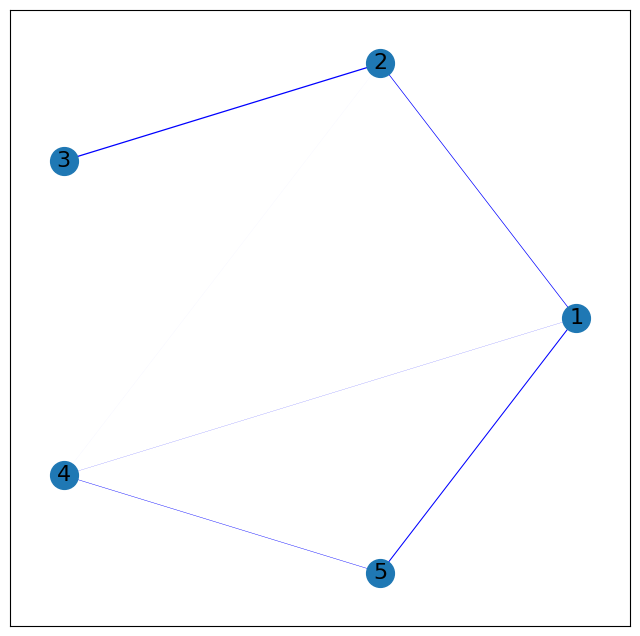

In [ ]:
layout = nx.circular_layout(G)

fig, ax = plt.subplots(figsize=(8,8))

nx.draw_networkx_nodes(G, layout,node_size=400)
nx.draw_networkx_labels(G, layout, font_size=16, font_family="sans-serif")
nx.draw_networkx_edges(G, layout, edgelist=G.edges, width=weights, edge_color="blue", ax=ax);

